In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
from datetime import date

warnings.filterwarnings("ignore")

In [2]:
df_patients = pd.read_excel('HospitalDatabase.xlsx','Patients')
df_ed_visits = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
df_ambulatory_visits = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')
df_discharge = pd.read_excel('HospitalDatabase.xlsx','Discharges')
df_ed_unique = pd.read_excel('HospitalDatabase.xlsx','EDUnique')
df_providers = pd.read_excel('HospitalDatabase.xlsx','Providers')

df_patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


# 61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [3]:
arr = np.arange(1,31).reshape(6,5)
print(arr[2,:2],arr[3,:2])

[11 12] [16 17]


# 62. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [4]:
data = {
    'Acuity': df_ed_visits['Acuity'],
    'EDDisposition': df_ed_visits['EDDisposition']
       }
df = pd.DataFrame(data)
df_count = df.groupby(['Acuity', 'EDDisposition']).size().reset_index(name='Count')
df_count.set_index(['Acuity', 'EDDisposition'], inplace=True)
df_count

Count
Acuity EDDisposition       
1      Admitted          32
       Discharged       558
2      Admitted         116
       Discharged        66
3      Admitted          81
4      Admitted         107
       Discharged        30
5      Admitted         179
       Discharged        30

# 63. List male patients over the age of 60 who have undergone surgery from January-March 2019.

# 64. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [5]:
splitName = pd.DataFrame(df_providers['ProviderName'])
splitName[['FirstName','LastName']] = splitName['ProviderName'].str.split(expand = True)
splitName
# Drop the Provider Name column
splitName.drop('ProviderName', axis=1, inplace=True)
splitName

,FirstName,LastName
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


# 65. Plot a graph showing the count of patients for the reason visited the hospital.

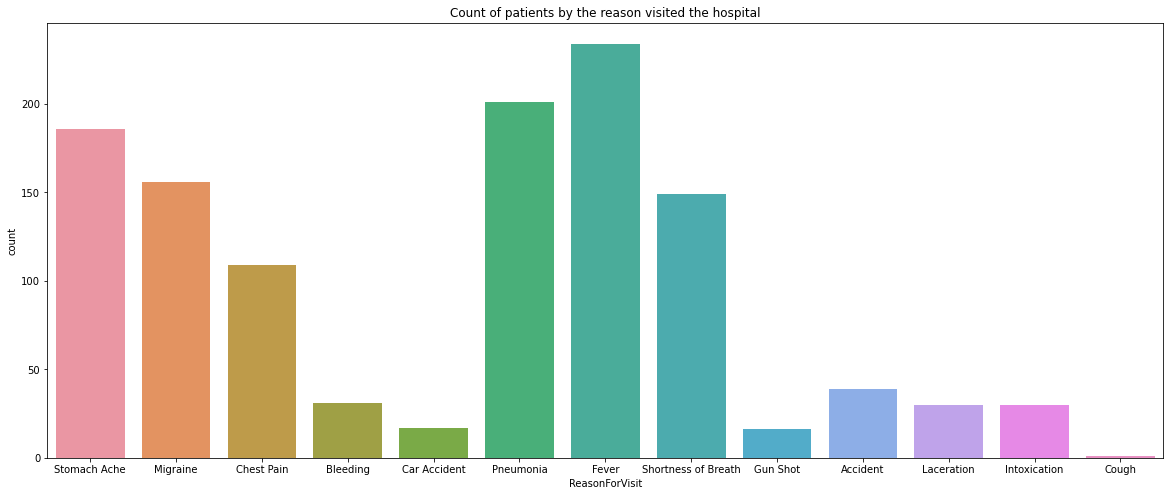

In [6]:
plt.figure(figsize=(20,8))
plt.title('Count of patients by the reason visited the hospital')
sns.countplot(data = df_ed_visits,x = 'ReasonForVisit')
plt.show()

# 66. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [7]:
migrainePatientIDs = df_ed_unique[df_ed_unique['ReasonForVisit']=='Migraine']['PatientID']
migrainePatients = df_patients[df_patients['PatientID'].isin(migrainePatientIDs)]
(migrainePatients[['FirstName','LastName','DateOfBirth']])

,FirstName,LastName,DateOfBirth
1,Far,Myers,1985-11-15 02:08:42.090
2,Devlin,Michael,1976-04-15 02:52:09.762
11,Zonnya,Ab,1963-05-23 10:04:33.074
13,Gan,Yu,1970-06-02 06:22:54.675
21,Joesph,Long,1979-12-04 16:45:56.080
...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483
907,Knox,Group,1975-08-25 22:27:50.177
909,Kuvalis,Coupland,1986-05-23 19:23:27.752
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178


# 67. Make a pivot table by the no. of patients from the admission date till discharge date.

In [8]:
df_discharge['LOS'] = pd.to_datetime(df_discharge['DischargeDate']) - pd.to_datetime(df_discharge['AdmissionDate'])
pivot_table = pd.pivot_table(df_discharge,values = ['PatientID'] ,index = ['AdmissionDate', 'LOS'], aggfunc = 'count')
pivot_table

PatientID
AdmissionDate LOS                               
2018-01-01    3 days 19:59:31.391000           1
              3 days 21:28:51.898000           1
              3 days 22:28:23.672000           1
              4 days 05:47:04.933000           1
              4 days 14:18:30.029000           1
...                                          ...
2018-02-22    13 days 21:22:10.061000          1
              14 days 02:43:18.749000          1
              14 days 09:27:18.377000          1
              16 days 06:06:12.068000          1
              16 days 20:38:30.568000          1

[720 rows x 1 columns]

# 68.Calculate average LOS.

In [9]:
df_discharge['ExpectedLOS'].mean()

8.82458915915616

# 69. Number of patients on 'Transfer' based on primary diagnosis.

In [10]:
transferPatients = df_discharge[df_discharge['DischargeDisposition']=='Transfer']
print('Number of patients on Transfer based on primary diagnosis is :',len(transferPatients) )

Number of patients on Transfer based on primary diagnosis is : 39


# 70. Violin plot for Level of Acuity by Visit Reason

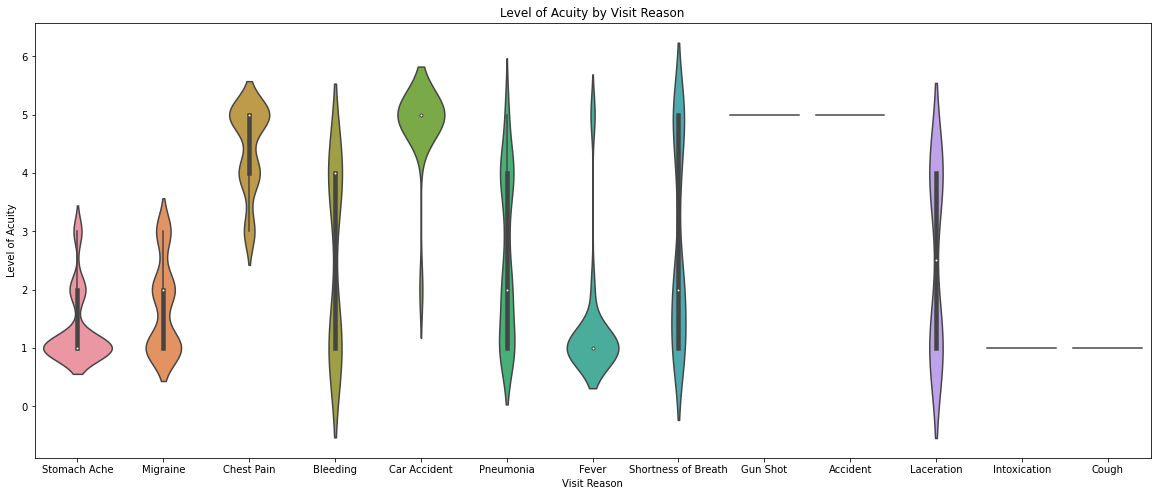

In [11]:
plt.figure(figsize=(20,8))
sns.violinplot(data = df_ed_visits, x = 'ReasonForVisit' , y = 'Acuity')
plt.title('Level of Acuity by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Level of Acuity')
plt.show()

# 71. Find the count of White Spanish Male.

In [12]:
whiteSpanishMale = df_patients[(df_patients['Race']=='White') & (df_patients['Gender']=='Male') & (df_patients['Language']=='Spanish')]
count = len(whiteSpanishMale)
print("The count of White Spanish Male is:", count)

The count of White Spanish Male is: 15


# 72. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [13]:
diagnosisMax = df_discharge.groupby('PrimaryDiagnosis')['ExpectedLOS'].max()
diagnosisMin = df_discharge.groupby('PrimaryDiagnosis')['ExpectedLOS'].min() 
diff = diagnosisMax - diagnosisMin
sortedDiff = diff.sort_values(ascending=False)
print("Primary diagnosis with the biggest difference: ", sortedDiff.head(1))

Primary diagnosis with the biggest difference:  PrimaryDiagnosis
Pneumonia    14.83426
Name: ExpectedLOS, dtype: float64


# 73. Which patient id has most entries in readmission registry.

# 74. "Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values."

# 75. "Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)"

In [14]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
np.dot(a,b)

array([[10, 13],
       [28, 40]])

# 76. Mortality O:E

# 77. Plot a graph to count the patients based on discharge disposition.

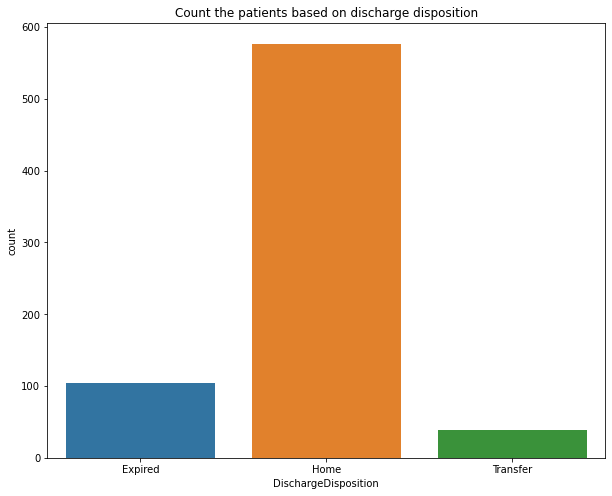

In [15]:
plt.figure(figsize=(10,8))
plt.title('Count the patients based on discharge disposition')
sns.countplot(data = df_discharge,x = 'DischargeDisposition' )
plt.show()

# 78. Display total count of patients service wise based on gender.


# 79.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

# 80. Display the data for all 'White Female' patients above the age of 50.